# Computerphysik Programmiertutorial 12
Prof. Dr. Matteo Rizzi und Dr. Markus Schmitt - Institut für Theoretische Physik, Universität zu Köln
&nbsp;

**Github**: [https://github.com/markusschmitt/compphys2022](https://github.com/markusschmitt/compphys2022)

**Inhalt dieses Notebooks**: Zufälliges Clusterwachstum, Herangehensweise für numerische Experimente

# Zufälliges Clusterwachstum

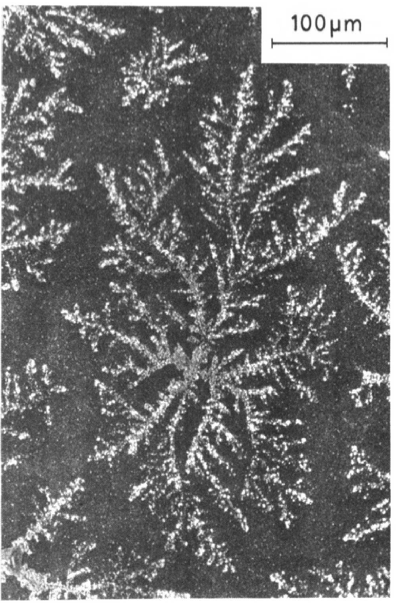

*Ablagerung von Gold aufgedampft auf einer Glasoberfläche. Bild aus [[J. Phys. Chem. 1995, 99, 15, 5639–5644]](https://pubs.acs.org/doi/10.1021/j100015a056)*

Modell:
- Teilchen bewegen sich auf einem Quadratgitter.
- Es gibt ein erstes Teilchen, an dem der Cluster wächst -- der "Seed"
- Teilchenbewegung entspricht einem Random walk.
- Wenn eine der nächsten benachbarten Zellen eines Teilchen zum Cluster gehört, wird das Teilchen mit Wahrscheinlichkeit $p_{nn}$ dem Cluster hinzugefügt und bewegt sich nicht weiter
- Wenn eine der übernächsten benachbarten Zellen eines Teilchen zum Cluster gehört, wird das Teilchen mit Wahrscheinlichkeit $p_{nnn}$ dem Cluster hinzugefügt und bewegt sich nicht weiter

![SegmentLocal](cluster_growth.gif "segment")

In [ ]:
using Plots, Random, LinearAlgebra

## Random walk

In [ ]:
function walk!(x, directions=[1,2,3,4])
    
end

In [ ]:
# Test


## Initialisierung

In [ ]:
# Erzeuge zufällige Startpositionen auf einem Kreis mit Radius R
function init_particle(R)
    
    # Zufälligen Winkel generieren
    phi = ...
    
    # Teilchenposition berechnen
    x = zeros(Int, 2)
    x = ...
    
    return x
end

In [ ]:
# Test

plot()
for i in 1:100
    x = init_particle(100)
    scatter!([x[1]],[x[2]], aspect_ratio=:equal, legend=:none)
end
plot!()

## Buchhaltung: Nachbarn zählen

In [ ]:
# Zähle die besetzen benachbarten Gitterplätze 
# und erzeuge ein Array mit den unbesetzten Nachbarplätzen (=möglichen Bewegungsrichtungen).
function find_neighbors(x, C)
    L = size(C)[1]
    
    free_neighbors = []  # Liste der freien benachbarten Gitterplätze
    
    # nächste Nachbarn
    nearest = 0  # Zahlvariable für besetzt nächste Nachbarn
    # links

    # rechts

    # oben

    # unten

    
    # übernächste Nachbarn
    next_nearest = 0 # Zahlvariable für besetzt übernächste Nachbarn
    # links oben

    # rechts oben

    # links unten

    # rechts unten

    
    return (free_neighbors, nearest, next_nearest)
end

## Simulationsschritt

In [ ]:
function grow!(C, Rmax, p_nn, p_nnn)
    
    L = size(C)[1] # Gittergröße
    x0 = [div(L,2), div(L,2)] # Position des Seeds
    
    # Teilchen initialisieren
    x = ...

    # Verwerfe das Teilchen, wenn es sich zu weit vom Cluster entfernt
    while norm(x-x0) < min(3*Rmax, div(L,2))
        # Finde Nachbarn

        
        # Teilchen absorbieren

             
        # Teilchen bewegen


    end
    
    return Rmax
end

## Simulation

In [ ]:
Random.seed!(4321)

L = 400 # Systemgröße
C = zeros(Int8, L, L) # Cluster array
C[div(L,2),div(L,2)] = 1  # Seed Teilchen

# Wahrscheinlichkeiten
p_nn = 0.8
p_nnn = 0.05

# Anfangswert für R_max
R_max = 10

anim = @animate for i in 1:200
    global R_max
    for i in 1:20
        # Simulation step
        R_max = grow!(C, R_max, p_nn, p_nnn)
    end
    
    # Plot
    heatmap(C, xlims=(100,300), ylims=(100,300), axis=:off, xticks=:none, yticks=:none, 
                legend=:none, aspect_ratio=:equal, color=cgrad(:grays,rev=true))
end

gif(anim, "cluster_growth.gif")

# Problemlösungsalgorithmus für numerische Experimente

Numerische Experimente werden schnell komplex. Daher sollte man beim Lösen des Problems schrittweise vorgehen um den Überblick zu behalten und Fehler frühzeitig zu identifizieren:

1. Analysieren des Problems: Gleichungen verstehen und numerische Aufgaben identifizieren.
2. Zerlegen des Problems in Teilprobleme.
3. Lösungen der Teilprobleme implementieren (separate Funktionen).
4. Lösungen mit einfachen Beispielen testen.
5. Daten produzieren.
6. Daten analysieren. Das Ergebnis auf Plausibilität prüfen.